# 情感分析代码（SnowNLP库）

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP
from snownlp import sentiment

#导入数据集
df = pd.read_csv(r"C:\Users\steph\OneDrive\Desktop\online_shopping_10_cats.csv", encoding="utf-8")

In [352]:
#查看数据长度与类型
print(len(df))
print(type(df))

62774
<class 'pandas.core.frame.DataFrame'>


In [353]:
#制作一个属于'review'的数据集
df1 = df["review"] 
print('所取得的评论：\n', df1)

所取得的评论：
 0        ﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1        作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2        作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3        作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4        作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
                               ...                        
62769    我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
62770    房间很小，整体设施老化，和四星的差距很大。毛巾太破旧了。早餐很简陋。房间隔音很差，隔两间房间...
62771                        我感觉不行。。。性价比很差。不知道是银川都这样还是怎么的！
62772    房间时间长，进去有点异味！服务员是不是不够用啊！我在一楼找了半个小时以上才找到自己房间，想找...
62773    老人小孩一大家族聚会，选在吴宫泛太平洋，以为新加坡品牌一定很不错，没想到11点30分到前台，...
Name: review, Length: 62774, dtype: object


In [354]:
#去重数据
df1 = pd.DataFrame(df1.unique())
print(len(df1))

62725


In [356]:
#进行感情分析
df["review"] = df["review"].astype(str)
scores = df['review'].apply(lambda x: SnowNLP(x).sentiments)

(array([23819.,  3313.,  2292.,  1839.,  1720.,  1658.,  1693.,  2018.,
         3048., 21374.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

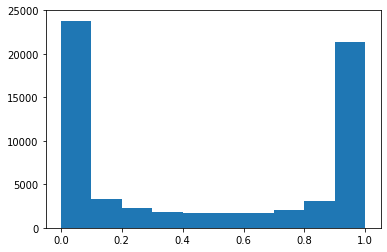

In [357]:
#绘制柱状图
import matplotlib.pyplot as plt
plt.hist(scores)

In [358]:
#分析评论（越接近0.9越积极，越接近0.1越消极）
positive_coms = df1[scores >= 0.9]
negative_coms = df1[scores < 0.1]

print('非常好评：')
print(positive_coms)
print('--------------------------------------------')
print('非常差评：')
print(negative_coms)

非常好评：
                                                       0
0      ﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1      作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2      作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3      作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4      作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
...                                                  ...
62373                          非常差的酒店，只住了1天就逃走了（本来预订了7天）
62460  标准间的卫生间居然热水都上不来，后来叫来了服务生和经理折腾了半个小时才弄好。。。 第一次住这...
62476  本来从来不喜欢点评，就为了这家酒店，今天花半个小时时间把这趟行程的酒店都点评了！ 你们见过五...
62641         奇葩酒店，卫生情况实在无语，我儿子一个晚上基本没着么睡，被小虫叮的身上全是包，太烂了
62717  1、中午快一点到店，说房间没有收拾出来，只好寄存行李出去玩，晚上回到房间满屋烟味，打电话后给...

[21374 rows x 1 columns]
--------------------------------------------
非常差评：
                                                       0
445    晕死，发表的评论竟然无法编辑？？？我想改几个错别字就不行吗？？？“于己，是一泄郁闷的痛苦”应...
521    以前一直不喜欢喝水，虽然同学都说喝水对身体有好处。但我不到口渴得不行了，是不会喝水的。但看了...
534    已经评过了，可是还要求我来评价，这是什么玩意啊？当当的一些功能特别的差劲！难道我买基本就得评...
1405 

C:\Users\steph\AppData\Local\Temp\ipykernel_4732\483475465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_coms = df1[scores >= 0.9]
C:\Users\steph\AppData\Local\Temp\ipykernel_4732\483475465.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_coms = df1[scores < 0.1]


In [359]:
#标数据，分别有‘好评’和‘差评’
com_sco = []
pos = 0
neg = 0

for i in scores:
    if (i>=0.9):
        com_sco.append("好评")
        pos = pos + 1
    else :
        com_sco.append("差评")
        neg = neg + 1

In [360]:
#把数据导入该列
df['Scores'] = scores
df['Type'] = com_sco

In [361]:
#存入csv
df.to_csv(r"C:\Users\steph\OneDrive\Desktop\online_shopping_10_cats.csv")

In [362]:
#计算好评率
rate = pos/(pos + neg)

print('好评：%d'% (pos))
print('差评：%d'% (neg))
print('好评率：%.f%%' % (rate * 100))

好评：21374
差评：41400
好评率：34%


In [363]:
#计算精准度
df = pd.read_csv(r"C:\Users\steph\OneDrive\Desktop\online_shopping_10_cats.csv")
data = df[df['label'] == df['Scores']]
print('准确率为：{:.3%}'.format(len(data)/len(df)))

准确率为：2.801%


In [367]:
#替换‘好评’和‘差评’
df2 = df.iloc[:,4:9]
df2.iloc[:,-1].replace(['好评','差评'],[1,0],inplace=True)
df2.head()

,cat,label,review,Scores,Type
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1.0,1
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,1.0,1
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,1.0,1
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,1.0,1
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,1.0,1


In [368]:
#计算精准度
data = df2[df2['label'] == df2['Type']]
print('准确率为：{:.3%}'.format(len(data)/len(df)))

准确率为：79.679%
